### Cirrhosis Patient Survival Prediction

##### We have a data set for patients with cirrhosis and diagnosis of cases among males and females, and there are those under follow-up and those who have died, as well as data on the stages of the disease and the symptoms or diseases associated with it.

#### Here we will analyze the data, present the results, and then train a learning model on it to predict the possibility of a person surviving or not.

In [1]:
# import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading data files
df  = pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv')
df1 = pd.read_csv('/kaggle/input/playground-series-s3e26/test.csv')
df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


### data analysis

In [3]:
df.N_Days.value_counts()

N_Days
1216    117
1434    105
769      83
3445     73
1765     64
       ... 
1870      1
2523      1
1214      1
3492      1
214       1
Name: count, Length: 461, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [5]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [6]:
# We display the different variables in the data set
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
for column in categorical_columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print()

Column: Status
Status
C     4965
D     2665
CL     275
Name: count, dtype: int64

Column: Drug
Drug
Placebo            4010
D-penicillamine    3895
Name: count, dtype: int64

Column: Sex
Sex
F    7336
M     569
Name: count, dtype: int64

Column: Ascites
Ascites
N    7525
Y     380
Name: count, dtype: int64

Column: Hepatomegaly
Hepatomegaly
Y    4042
N    3863
Name: count, dtype: int64

Column: Spiders
Spiders
N    5966
Y    1939
Name: count, dtype: int64

Column: Edema
Edema
N    7161
S     399
Y     345
Name: count, dtype: int64



#### We find here that the data set here is balanced in the number of deceased and those under surveillance and in several other variables,This will not affect the analysis, but it will have a negative impact on the machine learning process


In [7]:
#Make sure there are no empty values
df.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

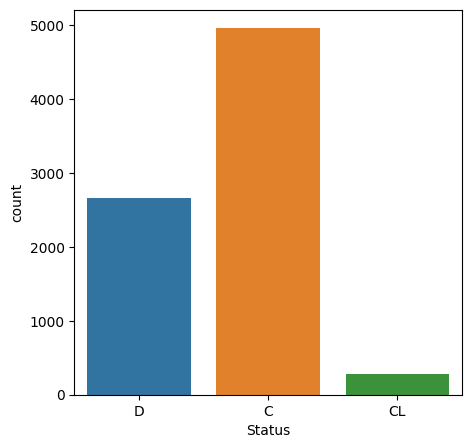

In [8]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Status', data =df)
plt.show()

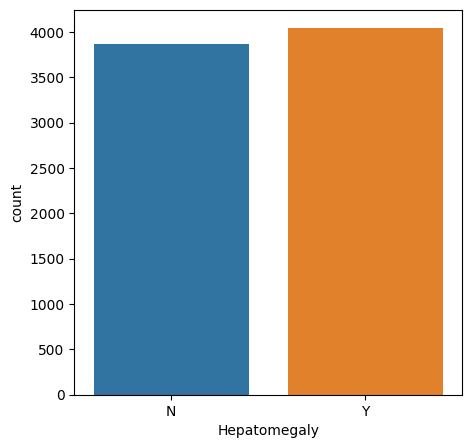

In [9]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Hepatomegaly', data =df)
plt.show()

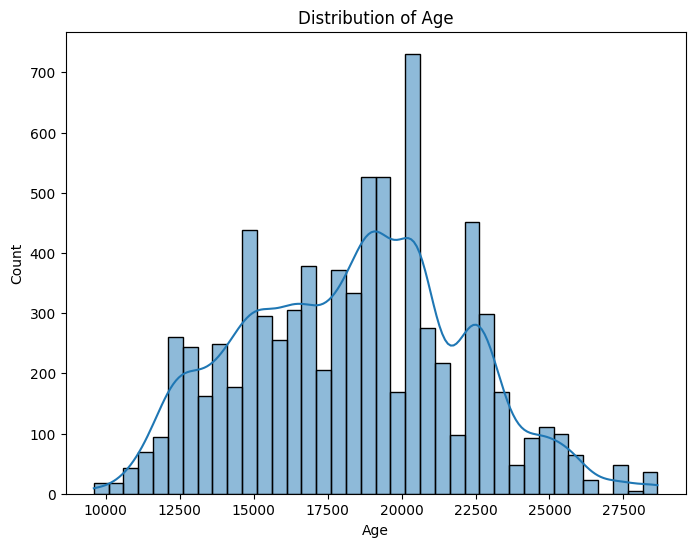

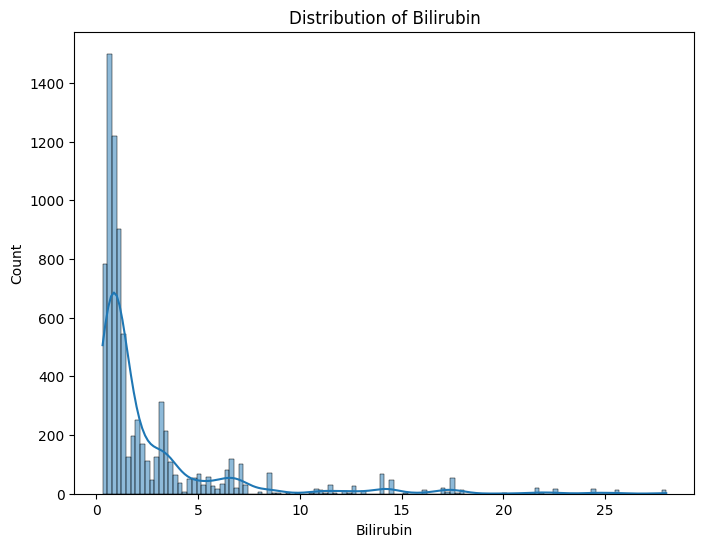

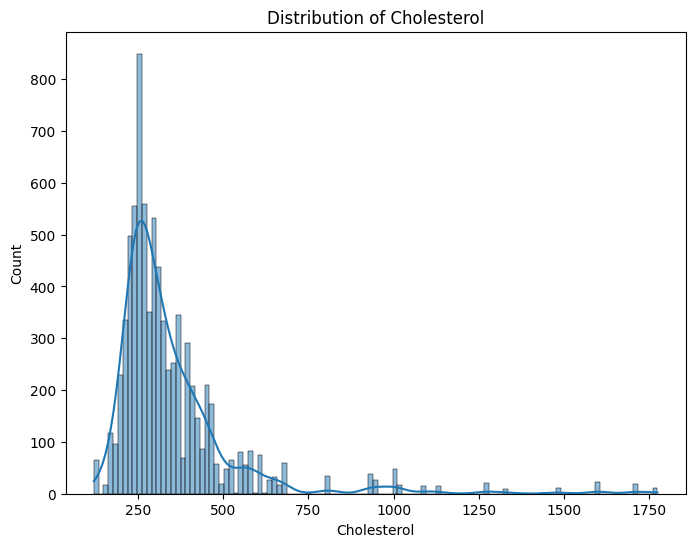

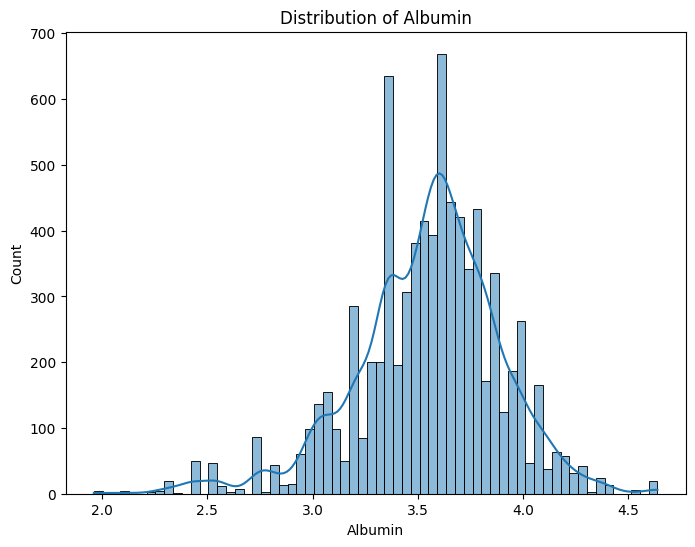

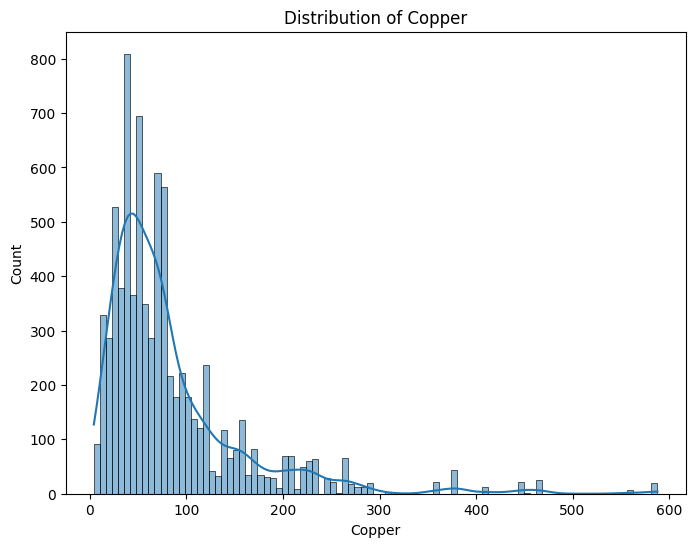

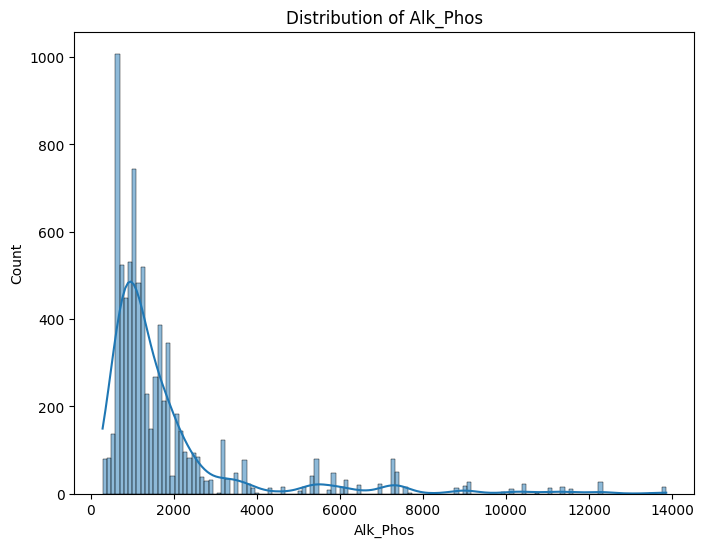

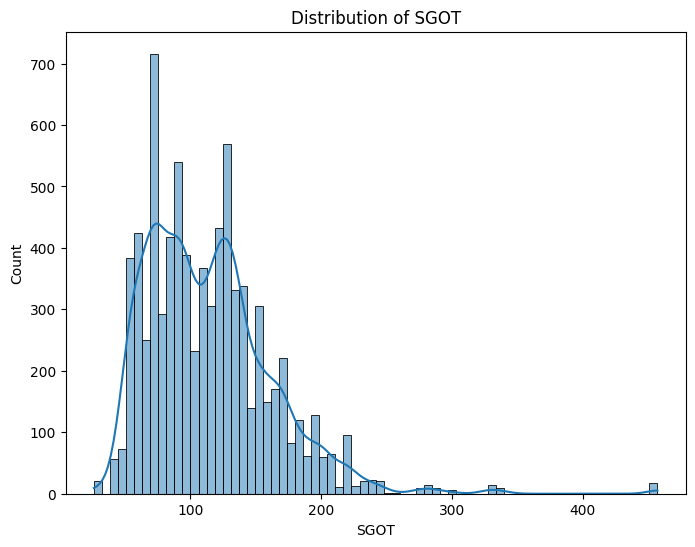

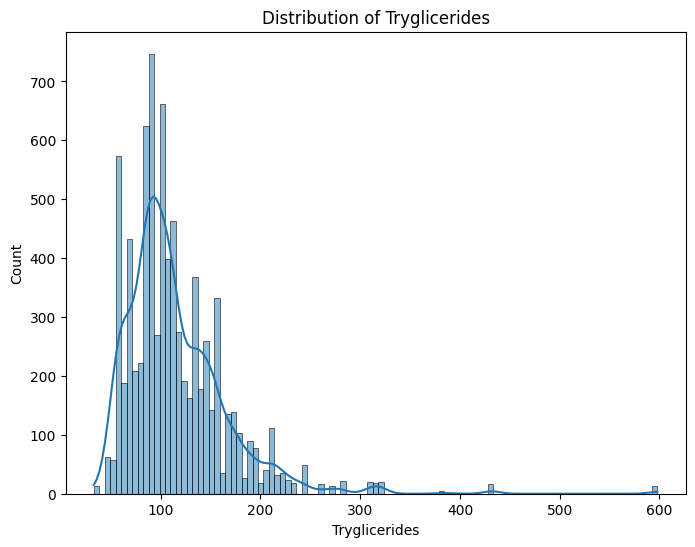

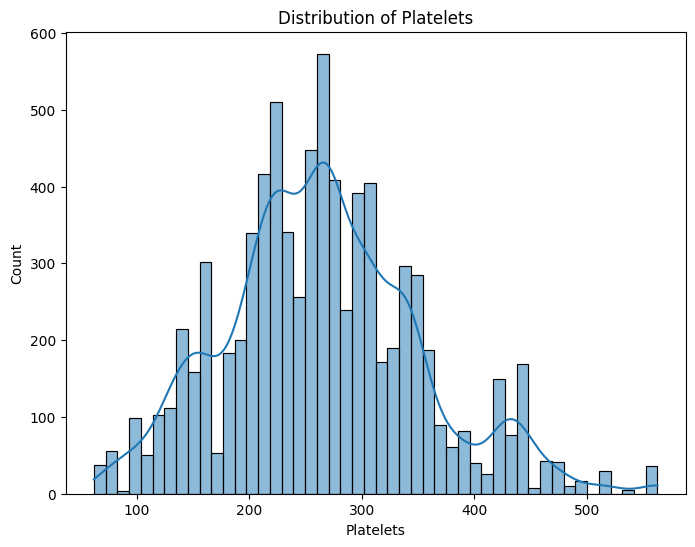

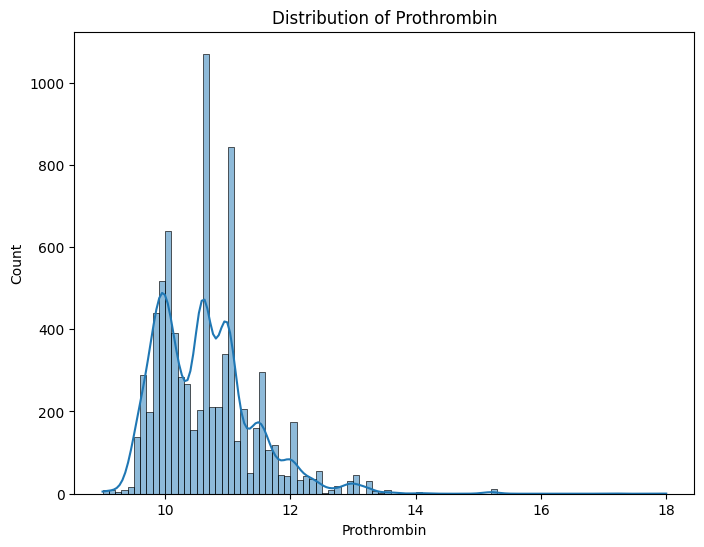

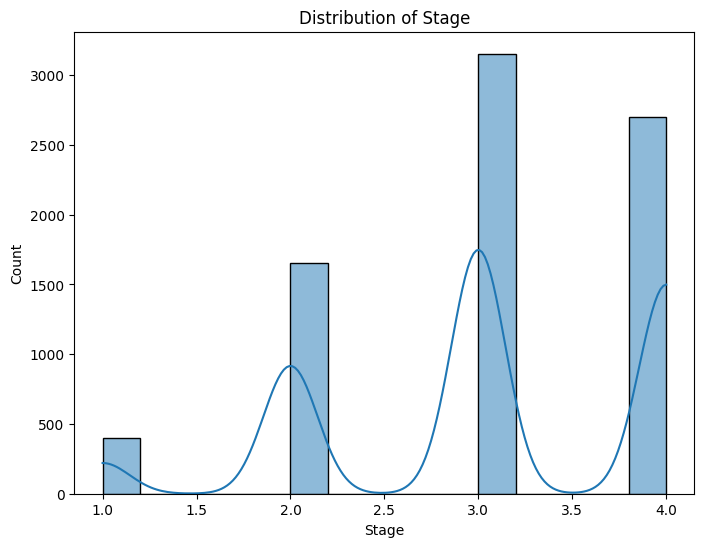

In [10]:
# We use a for loop to visualize columns of data
numeric_columns = [ 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

In [11]:
encoder = LabelEncoder()

In [12]:
df.Drug = encoder.fit_transform(df.Drug)
df.Sex = encoder.fit_transform(df.Sex)
df.Ascites = encoder.fit_transform(df.Ascites)
df.Hepatomegaly = encoder.fit_transform(df.Hepatomegaly)
df.Spiders = encoder.fit_transform(df.Spiders)
df.Edema = encoder.fit_transform(df.Edema)
df.Status = encoder.fit_transform(df.Status)

In [13]:
#df1.Drug = encoder.fit_transform(df1.Drug)
df1.Sex = encoder.fit_transform(df1.Sex)
df1.Ascites = encoder.fit_transform(df1.Ascites)
df1.Hepatomegaly = encoder.fit_transform(df1.Hepatomegaly)
df1.Spiders = encoder.fit_transform(df1.Spiders)
df1.Edema = encoder.fit_transform(df1.Edema)

In [14]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,2
1,1,2574,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0
2,2,3428,1,13727,0,0,1,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,2
3,3,2576,1,18460,0,0,0,0,0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,0
4,4,788,1,16658,0,0,1,0,0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,0


In [15]:
x = df.drop(["id","Status"],axis=True)
y = df.Status

In [16]:
x.values
y.values

array([2, 0, 2, ..., 2, 2, 0])

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state=20)

In [18]:
#We create a function that makes it easy for us to train and test any model
def kfolds(model, model_name):
    model = cross_val_score(model, x,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")
def model_train(model,model_name):
    model.fit(X_train,Y_train)
    model_train_score = model.score(X_train, Y_train)
    model_test_score = model.score(X_test, Y_test)
    print(f"{model_name} model score on Train= {model_train_score *100}%\n{model_name} model score on Test= {model_test_score*100}%")

In [19]:
model = DecisionTreeClassifier()
model_train(model,'DecisionTreeClassifier')
kfolds(model,'DecisionTreeClassifier')

DecisionTreeClassifier model score on Train= 100.0%
DecisionTreeClassifier model score on Test= 73.59635811836115%
DecisionTreeClassifier score on cross validation: 73.30779817247836%


In [20]:
model1 = RandomForestClassifier(random_state=20)
model_train(model1,'RandomForestClassifier')
kfolds(model1,'RandomForestClassifier')

RandomForestClassifier model score on Train= 100.0%
RandomForestClassifier model score on Test= 81.48710166919575%
RandomForestClassifier score on cross validation: 82.45423994623053%


In [21]:
model2 = XGBClassifier()
model_train(model2,'XGBClassifier')
kfolds(model2,'XGBClassifier')

XGBClassifier model score on Train= 99.7638326585695%
XGBClassifier model score on Test= 81.79059180576631%
XGBClassifier score on cross validation: 82.93486853686248%


In [22]:
model3 = SVC()
model_train(model3,'SVC')
kfolds(model3,'SVC')

SVC model score on Train= 73.59986504723346%
SVC model score on Test= 72.48356095093577%
SVC score on cross validation: 73.49805565779576%


### We find that the RandomForestClassifier model is the best in terms of over-fitting, but the learning result is not high because the data is not normally distributed and unorganized.